## Framing the Problem
Your task is to build a machine learning model that predicts house prices in King County, an area in the US state of Washington, as described in Chapter 2 of the book *Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow*. Please read chapter 2 carefully in parallel. Your model should learn from the given data and be able to predict new home prices using the given metrics. Let's take a look at our given dataset:

The following code imports some packages, mounts the Google Drive folder and loads the data. Run the code and adapt the file paths!

In [ ]:
import pandas as pd
from google.colab import drive
from google.colab import data_table
import matplotlib.pyplot as plt
data_table.enable_dataframe_formatter()

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kc_house_data.csv")

data.head(10)

print(data["price"].median())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
450000.0


Description of the dataset
* id: a notation for a house
* date: Date house was sold
* price: Price is prediction target
* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: square footage of the home 
* sqft_lot: square footage of the lot 
* floors: Total floors (levels) in house 
* waterfront: House which has a view to a waterfront
* view: Has been viewed
* condition: How good the condition is Overall 
* grade: overall grade given to the housing unit, based on King County grading system 
* sqft_above: square footage of house apart from basement 
* sqft_basement: square footage of the basement 
* yr_built: Built Year 
* yr_renovated: Year when house was renovated 
* zipcode: zip code 
* lat: Latitude coordinate 
* long: Longitude coordinate

See chapters 1 & 2 for all questions below!

What is a machine learning pipeline? Please make a fictitious example that is appropriate for our data set.

Is our task a a supervised, unsupervised, semi-supervised, self-supervised, or reinforcement learning task? Is it a classification or regression task? Do we use batch or online learning?

What is a performance measure? Give two typical examples of performance measures in regression models. How can these be interpreted in a linear regression?


##Take a Quick Look at the Data Structure

Try to use the functions *head()*, *describe()* and *info()* to get further informations of the dataset. Additional use *value_counts()* to get all possible values of one variable. For all variables, consider whether they are categorical, ordinal, or numeric! Do you notice anything about the variable waterfront when you compare it with the variable renovated?

In [ ]:
data.head()
data.describe()
data.info()
data.value_counts()

#most categories are numeric, but we also have some that are ordinal, like grade, or categorical like renovated 
#The variable "waterfront" is a binary variable indicating whether the property has a waterfront or not (0 or 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
dtypes: flo

date             price      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  lat      long    
20140502T000000  235000.0   2         1.00       1210         9400      1.0     0           0     2          6      1210        0              1949      0             98106    47.5342  -122.360    1
20141223T000000  1130000.0  4         3.00       3180         4649      2.0     0           0     4          9      2070        1110           1925      0             98105    47.6583  -122.273    1
20141224T000000  255000.0   3         1.50       1110         10296     1.0     0           0     5          7      1110        0              1964      0             98042    47.4220  -122.153    1
                                      1.00       1580         8206      1.0     0           0     3          7      1100        480            1962      0             98198    47.3676  -122.312    1
          

Try to visualize the distributions of all the variables. (Use the *hist()* function from *matplotlib*.) Are some distributions skewed? What is right-skewed or left-skewed? Do the scales of the different variables differ? What do you notice with the variable *yr_renovated*?

<ipython-input-5-6d1771634a12>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax)


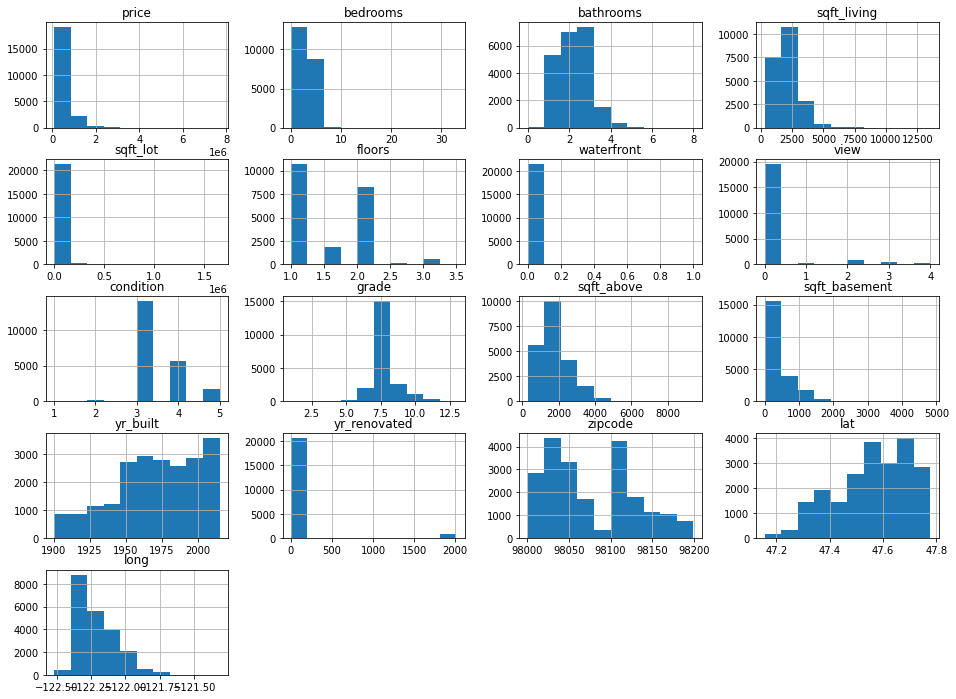

In [ ]:
fig, ax = plt.subplots(figsize=(16, 12))
data.hist(ax=ax)
plt.show()

#a lot of the distributions are skewed. 
#sqft liing is left skewed, as there are only few, really big houses, 
#lat is right skewed, as there appear to be more houses in higher latitudes 

Unrenovated houses have the entry 0. With which variable could we replace the entry 0?

Your task is to clean the dataset: 

1. Divide the variable *yr_renovated* into two variables.
2. Create a binary variable that indicates whether the house has been renovated or not. (0 = no renovation, 1 = renovated) You can use the *cut()* function.
3. Additionally overwrite the variable *yr_renovated* with the maximum of yr_renovated and yr_built, you can use the max() function.
4. Change the *date* column to *datetime* with the function *to_datetime()*.

In [ ]:
# Some Data Cleaning
#we could replace the 0 with FALSE and 1 with TRUE
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')
data['date'] = data['date'].dt.strftime('%Y-%m-%d')
data['renovated'] = (data['yr_renovated'] > data['yr_built']).astype(int)
data['yr_renovated'] = data[['yr_renovated', 'yr_built']].max(axis=1)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,98178,47.5112,-122.257,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,98028,47.7379,-122.233,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,98136,47.5208,-122.393,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,98074,47.6168,-122.045,0


##Create a Test Set

Try to explain what a *stratified sampling* is. Try to create a stratified train and test set, which should be named *train_set* and *test_set*. Create an extra column for this, which divides the house prices from the dataset into different categories. At the end, overwrite your dataset with the training dataset with *data = train_set.copy()*.

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

data['categories'] = pd.cut(data['price'], bins=[0, np.percentile(data['price'], 25), np.percentile(data['price'], 50), np.percentile(data['price'], 75), np.inf], labels=[1, 2, 3, 4])

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42, stratify=data['categories'])


train_set = train_set.copy()
test_set = test_set.copy()

In [ ]:
data = train_set.copy()
data.head(50)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,renovated,categories
19549,2014-08-07,419950.0,4,2.50,2260,5164,2.0,0,0,3,8,2260,0,1996,1996,98056,47.5090,-122.166,0,2
7318,2015-03-31,305000.0,3,2.50,1260,895,3.0,0,0,3,7,1160,100,2009,2009,98133,47.7072,-122.336,0,1
13501,2014-10-23,207000.0,4,2.00,1690,7728,1.5,0,0,4,7,1690,0,1967,1967,98198,47.3666,-122.318,0,1
9018,2014-08-18,580000.0,5,2.50,3110,15783,1.0,0,0,3,8,1720,1390,1974,1974,98052,47.6301,-122.103,0,3
6224,2014-10-07,606000.0,3,1.75,1970,8540,1.0,0,3,4,8,1130,840,1950,1950,98177,47.7213,-122.365,0,3
16423,2014-08-05,558000.0,4,2.50,3220,5120,2.0,0,0,3,9,2420,800,2000,2000,98118,47.5434,-122.270,0,3
65,2014-11-20,317625.0,3,2.75,2770,3809,1.5,0,0,5,7,1770,1000,1925,1925,98144,47.5747,-122.304,0,1
427,2015-02-25,1300000.0,3,2.00,2350,15021,1.0,0,0,4,8,1770,580,1976,1976,98004,47.6408,-122.219,0,4
15955,2015-03-31,850000.0,2,1.50,2210,5000,1.0,0,2,3,8,1530,680,1951,1951,98122,47.6122,-122.288,0,4
18375,2014-07-01,952500.0,4,1.50,2550,5055,2.0,0,0,4,10,2550,0,1910,1910,98112,47.6360,-122.301,0,4


##Explore and Visualize the Data to Gain Insights

First, try to visualize the geographic dates (*lat*, *long*) from our dataset in a scatter plot. Where are the expensive houses located? For example, you can use a logarithmic color bar to see where it is cheaper and more expensive. Consider how to combine the 'lat' and 'long' features into a simpler feature. (No implementation, but a consideration is sufficient).

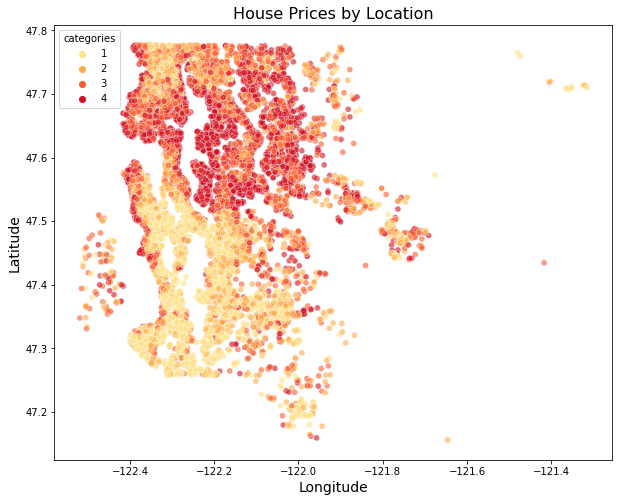

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='long', y='lat', hue='categories', palette='YlOrRd', alpha=0.6)
plt.title('House Prices by Location', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.show()


### Correlations

Since the dataset does not have so many features, it is quite easy to calculate the correlations of these. Please calculate all meaningful standard correlation effects with the function *corr()*. How can the values of this correlation effect be interpreted? What are probably the best variables to predict? For which variables does the Pearson coefficient make sense and for which not?

In [ ]:
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending=False)


price            1.000000
sqft_living      0.701232
grade            0.666412
sqft_above       0.606491
bathrooms        0.522465
view             0.400172
sqft_basement    0.320901
bedrooms         0.310721
lat              0.305983
waterfront       0.270390
floors           0.252733
renovated        0.124656
yr_renovated     0.106407
sqft_lot         0.093474
yr_built         0.054873
condition        0.031200
long             0.020606
zipcode         -0.057351
Name: price, dtype: float64

Additionally, create a scatter plot for the most important features using the Pandas scatter_matrix() function. What do you notice about the variables sqft_living, sqft_above and sqft_basement? 

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

attributes = ['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_basement','renovated', 'floors', 'yr_built']
scatter_matrix(data[attributes], figsize=(16, 12))
plt.show()
#it shows that all sqft tend to have a really strong positive corrlation with the price of the house 

## Experiment with Attribute Combinations

Try to combine the columns bedrooms, sqft_living by calculating the bedroom density, i.e. *bedrooms/sqft_living*. Check the new Pearson Correlation coefficients.


price              1.000000
sqft_living        0.701232
grade              0.666412
sqft_above         0.606491
bathrooms          0.522465
view               0.400172
sqft_basement      0.320901
bedrooms           0.310721
lat                0.305983
waterfront         0.270390
floors             0.252733
renovated          0.124656
yr_renovated       0.106407
sqft_lot           0.093474
yr_built           0.054873
condition          0.031200
long               0.020606
zipcode           -0.057351
bedroom_density   -0.478580
Name: price, dtype: float64

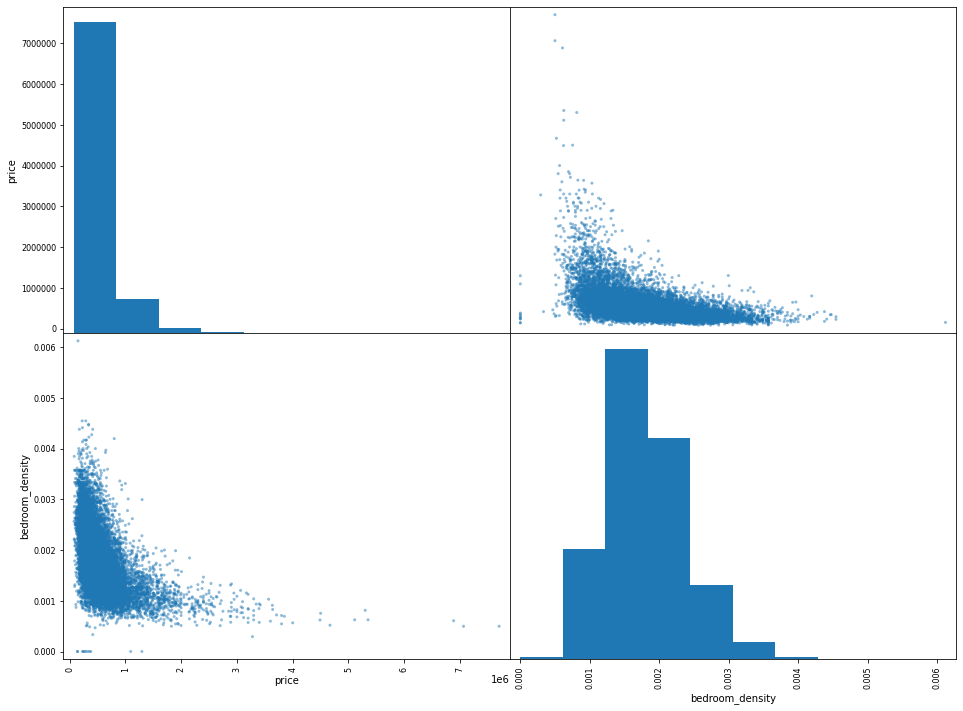

In [ ]:
from pandas.plotting import scatter_matrix


data['bedroom_density'] = data['bedrooms'] / data['sqft_living']

attributes = ['price', 'bedroom_density']
scatter_matrix(data[attributes], figsize=(16, 12))

corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending=False)

##Prepare the Data for Machine Learning Algorithms

In the first step, we separate our trainings dataset with our labeled dataset.

In [ ]:
data = train_set.drop("price", axis=1)
data_label = train_set[["price"]].copy()
data_label_test = test_set[["price"]].copy()
#create a data_label for the test set to later work with to evaluate the model on the test set 

###Missing Data

What options do we have to deal with missing values? What options do we have to deal with missing values? Write a code that give all lines, which have any missing value. What is the function *SimpleImputer(strategy="median")* doing?

In [ ]:
#we could for example replace missing values, with the average, the median, or we could eliminate all rows with missing values entirely 

print(data.isnull().values.any())

#the concerning function does exactly that. It is a way to deal with missing values, in a dataset by the mean, average etc. 
#but we apparently do not have any missing values anyway

False


###Handling Text and Categorical Attributes


What are ordinal and categorical data? Do we have such data in our data set? What possibilities do we have to transform this data correctly? What are dummy attributes? Try to understand what the function *OneHotEncoder()* does with the variable waterfront.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

waterfront_reshaped = data['waterfront'].values.reshape(-1, 1)
waterfront_encoded = cat_encoder.fit_transform(waterfront_reshaped)


##Feature Scaling and Transformation

What is min-max scaling and standardization of features? What is a heavy tail in a distribution? What problem do we have with min-max scaling and standardization on a heavy-tailed distribution? Can you make an example?

In [ ]:
data.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'renovated', 'categories'],
      dtype='object')

Try to brainstorm which variable conversion makes sense for which variable! Write down your guess! Try to understand the following two code blocks, how are the variables *long* and *lat* converted?

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin


#Categorical variables: One-hot encoding or label encoding
#Ordinal variables: Label encoding or assigning numerical values based on rank or order
#Continuous variables: Scaling or normalization


class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


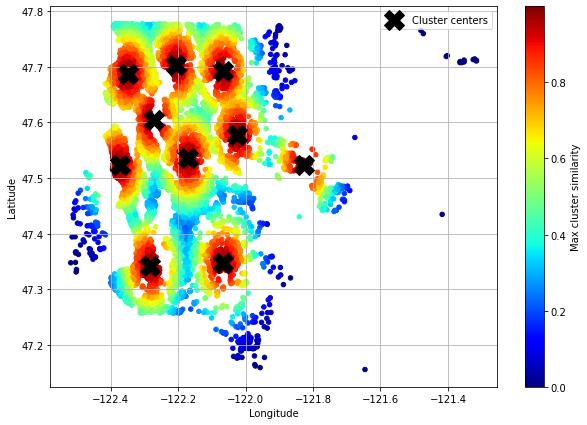

In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=100., random_state=42)
similarities = cluster_simil.fit_transform(data[["lat", "long"]],
                                           sample_weight=data_label["price"])

data_renamed = data.rename(columns={
    "lat": "Latitude", "long": "Longitude"})

data_renamed["Max cluster similarity"] = similarities.max(axis=1)

data_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")

plt.show()

Have a look at my suggestion of variable conversion. I ask you to understand the code in detail, what variable transformations have I made? What arguments are in favor, and what arguments might be against? How would you convert the variables if you compare it with your guess?

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import OneHotEncoder

def time(X):
 a =  pd.to_datetime("now") - X[X.columns[0]]
 a = a.dt.total_seconds()
 return a.to_frame()

date_pipeline = make_pipeline(
 FunctionTransformer(time),
 StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)

default_num_pipeline = make_pipeline(StandardScaler())

log_pipeline = make_pipeline(
 FunctionTransformer(np.log),
 StandardScaler())

label_pipeline = make_pipeline(
 FunctionTransformer(np.log)) 

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
 ("log", log_pipeline, ["sqft_living", "sqft_lot", "sqft_above"]),
 ("geo", cluster_simil, ["lat", "long"]),
 ("cat", cat_pipeline, ["waterfront", "renovated"]),
 ("date", date_pipeline, ["date"]),
 ("normal", default_num_pipeline, ["yr_built", "yr_renovated", "bedrooms", "bathrooms", "floors", "view", "condition", "grade"])
 ])

preprocessing_label = ColumnTransformer([
 ("log", label_pipeline, ["price"])
 ])

How many features do we have for predicition?

In [ ]:
print(data.dtypes)
data['date'] = pd.to_datetime(data['date'])#had to reconvert the date to be of datetime 

data_prepared = preprocessing.fit_transform(data)
data_prepared.shape

#features for prediction = (17290, 31)


date               object
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront          int64
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode             int64
lat               float64
long              float64
renovated           int64
categories       category
dtype: object


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


(17290, 31)

##Select and Train a Model

###Linear Model

The following code determines a linear regression model, again try to explain what the code computes!

In [ ]:
from sklearn.linear_model import LinearRegression

data_label_transformed = preprocessing_label.fit_transform(data_label)

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(data, data_label_transformed)

data_predictions = lin_reg.predict(data)

print(data_predictions)

#Train a linear regression model (LinearRegression) on data
#Features are preprocessed using preprocessing (a ColumnTransformer object)
#Target variable is preprocessed using preprocessing_label (another ColumnTransformer object)
#Model is trained on preprocessed data
#Predictions are made on data and stored in data_predictions


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


[[12.99742946]
 [12.8220905 ]
 [12.39490998]
 ...
 [13.10640271]
 [12.57069105]
 [12.92494849]]


Your task is to determine the median of the absolute error [Median(ABS(a-b))] (In addition, you can also get the percentage error by dividing by the actual sales value before taking the median.) and the Root Mean Square Error (RMSE)! Remember that estimates are logarithmic. Also calculate the median of all home prices. And try to evaluate all error values. How good is the model?

In [ ]:

data_predictions_orig = np.exp(data_predictions)
data_label_transformed_orig = np.exp(data_label_transformed)

abs_error = np.abs(data_predictions_orig - data_label_transformed_orig)
median_abs_error = np.median(abs_error)
rmse = np.sqrt(np.mean(np.square(data_predictions_orig - data_label_transformed_orig)))

median_price = np.median(data_label_transformed_orig)
pct_error = median_abs_error / median_price * 100

print(f"Median absolute error: {median_abs_error}")
print(f"RMSE: {rmse}")
print(f"Median home price: {median_price}")
print(f"Percentage error: {pct_error}")

#the model is relatively good in my opinion



Median absolute error: 49686.75417253602
RMSE: 146042.37698200566
Median home price: 450000.00000000035
Percentage error: 11.041500927230219


###Random Forest Regressor

We will now also compute a Radom Forrest model, automatically determining a cross validation with n = 10 on the training dataset. What happens during the cross validation? Why have I adjusted the R squared error with a separate function? What is the function *np.ravel* doing?

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

data_label_transformed = preprocessing_label.fit_transform(data_label)

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(data, np.ravel(data_label_transformed))

def adjusted_rsquare(y_true, y_pred, **kwargs):
  return -np.sqrt(np.mean((np.exp(y_true)-np.exp(y_pred))**2))

neg_exp_root_mean_squared_error = make_scorer(adjusted_rsquare, greater_is_better=False)

forest_rmses = -cross_val_score(forest_reg, data, np.ravel(data_label_transformed),
 scoring=neg_exp_root_mean_squared_error, cv=10)

print(f)

#during cross validation the model is split into equal parts and cross validated with the validation set 
#To convert the error metric from R squared to adjusted R squared, which penalizes overfitting more than R squared? 
#np ravel flattens an array to a 1d array 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, t

The following code outputs the RMSE for all 10 folds, compare it to the linear regression.

In [ ]:
pd.Series(forest_rmses).describe()

count        10.000000
mean    -132424.804104
std        6875.978500
min     -142808.537989
25%     -135874.527349
50%     -133742.227273
75%     -128516.846666
max     -118975.967448
dtype: float64

##Fine-Tune Your Model

###Grid Search & Randomized Search
Try to explain what the Grid Search and Random Search methods do. What are the advantages of each method. For which parameters would this make sense in our example?

###Evaluate Your System on the Test Set

Try to evaluate the final model with the test set. Compute the Median and 95% confidence interval of the root mean squared error and the median of the absolute error.

Remember to invert your results with the inverse functions you applied to the label variable as a preprocessing step. (The logarithm is the inverse function of the exponential function).

In [ ]:

#had to reconv datetime for this to work 
test_set["date"] = pd.to_datetime(test_set["date"], format="%Y-%m-%d %H:%M:%S")


data_predictions = lin_reg.predict(test_set)
print(data_predictions)

data_label_transformed_test = preprocessing_label.fit_transform(data_label_test) #convert the data 
#of the test set to have the original data label transformed for comparison of evaluations 

data_predictions_orig = np.exp(data_predictions)
data_label_transformed_orig = np.exp(data_label_transformed_test)

abs_error = np.abs(data_predictions_orig - data_label_transformed_orig)
median_abs_error = np.median(abs_error)
rmse = np.sqrt(np.mean(np.square(data_predictions_orig - data_label_transformed_orig)))

median_price = np.median(data_label_transformed_orig)
pct_error = median_abs_error / median_price * 100

print(f"Median absolute error: {median_abs_error}")
print(f"RMSE: {rmse}")
print(f"Median home price: {median_price}")
print(f"Percentage error: {pct_error}")



[[13.10998205]
 [13.05711806]
 [12.34055878]
 ...
 [13.24836794]
 [12.43819819]
 [12.93255431]]
Median absolute error: 51157.18108259456
RMSE: 147861.35065649575
Median home price: 450000.00000000035
Percentage error: 11.368262462798782


/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


##Launch, Monitor, and Maintain Your System

What package and code can we use to save and reload our model?

Why is it possible that we need a monitoring code?

Try to save our learned model so that we can reload it at any time.

In [ ]:
import pickle 

#we can save the model as a bitstream object with the pickle module
#we can then load it back in anytime

with open('lin_reg_model.pkl', 'wb') as f:
    pickle.dump(lin_reg, f)


In [ ]:
#I trained a neural net on another task, that will be described in the learning portfolio 

##Ideas for the Learning Portfolio

1) Adding a further model: In a few weeks we will learn neural networks, try to add this model!

2) Find a challenge on Kaggle for a regression dataset and use Chapter 2 and this colab to try to solve it. 